In [9]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import argparse

from func import *
from tensorflow.keras.models import load_model

def test_generator(image_folder_path, batch_size):              
    """
    Yields the next data batch.
    """
    images = os.listdir(image_folder_path)
    for offset in range(0, len(images), batch_size):
        X_test = []
        batch_images = images[offset:offset+batch_size]    
        for image_name in batch_images:
            image = cv2.imread(f"{image_folder_path}/{image_name}")
            image = cv2.resize(image, (256, 256), interpolation=None)
            X_test.append(image)
        X_test = np.array(X_test)/255
        yield X_test 

def plotImageWithMask(images, masks, binary=True):
    if binary:
        masks = (masks > 0.5).astype(np.uint8)
    else:
        masks = masks.astype(np.float32)
    fig = plt.figure(figsize=(20, 20))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    # get_pics
    i = 0
    for image, mask in zip(images, masks):
        ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
        ax.imshow(cv2.cvtColor(image.astype(np.float32), cv2.COLOR_BGR2RGB))
        ax = fig.add_subplot(6, 6, i + 2, xticks=[], yticks=[])
        ax.imshow(mask)
        i+=2

def get_args():
    parser = argparse.ArgumentParser(description='Train the UNet on images and target masks')
    parser.add_argument('--image-path', type=str, default="data/train_v2", help='Folder with train images', dest='image_path')
    parser.add_argument('--batch-size', dest='batch_size', type=int, default=32, help='Batch size')
    parser.add_argument('--model-path', dest='model_path', type=str, default="models/unet", help='Path to model')
    parser.add_argument('--binary-mask', dest='binary_mask', type=str, default=True, help='Plot class prediction (True) or probabilistic prediction (False)')
    parser.add_argument('--threshold', type=float, default=0.5, help='Threshhold fot binary classification')
    return parser.parse_args()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 256, 256, 16  0           ['conv2d[0][0]']                 
                                )                                                             

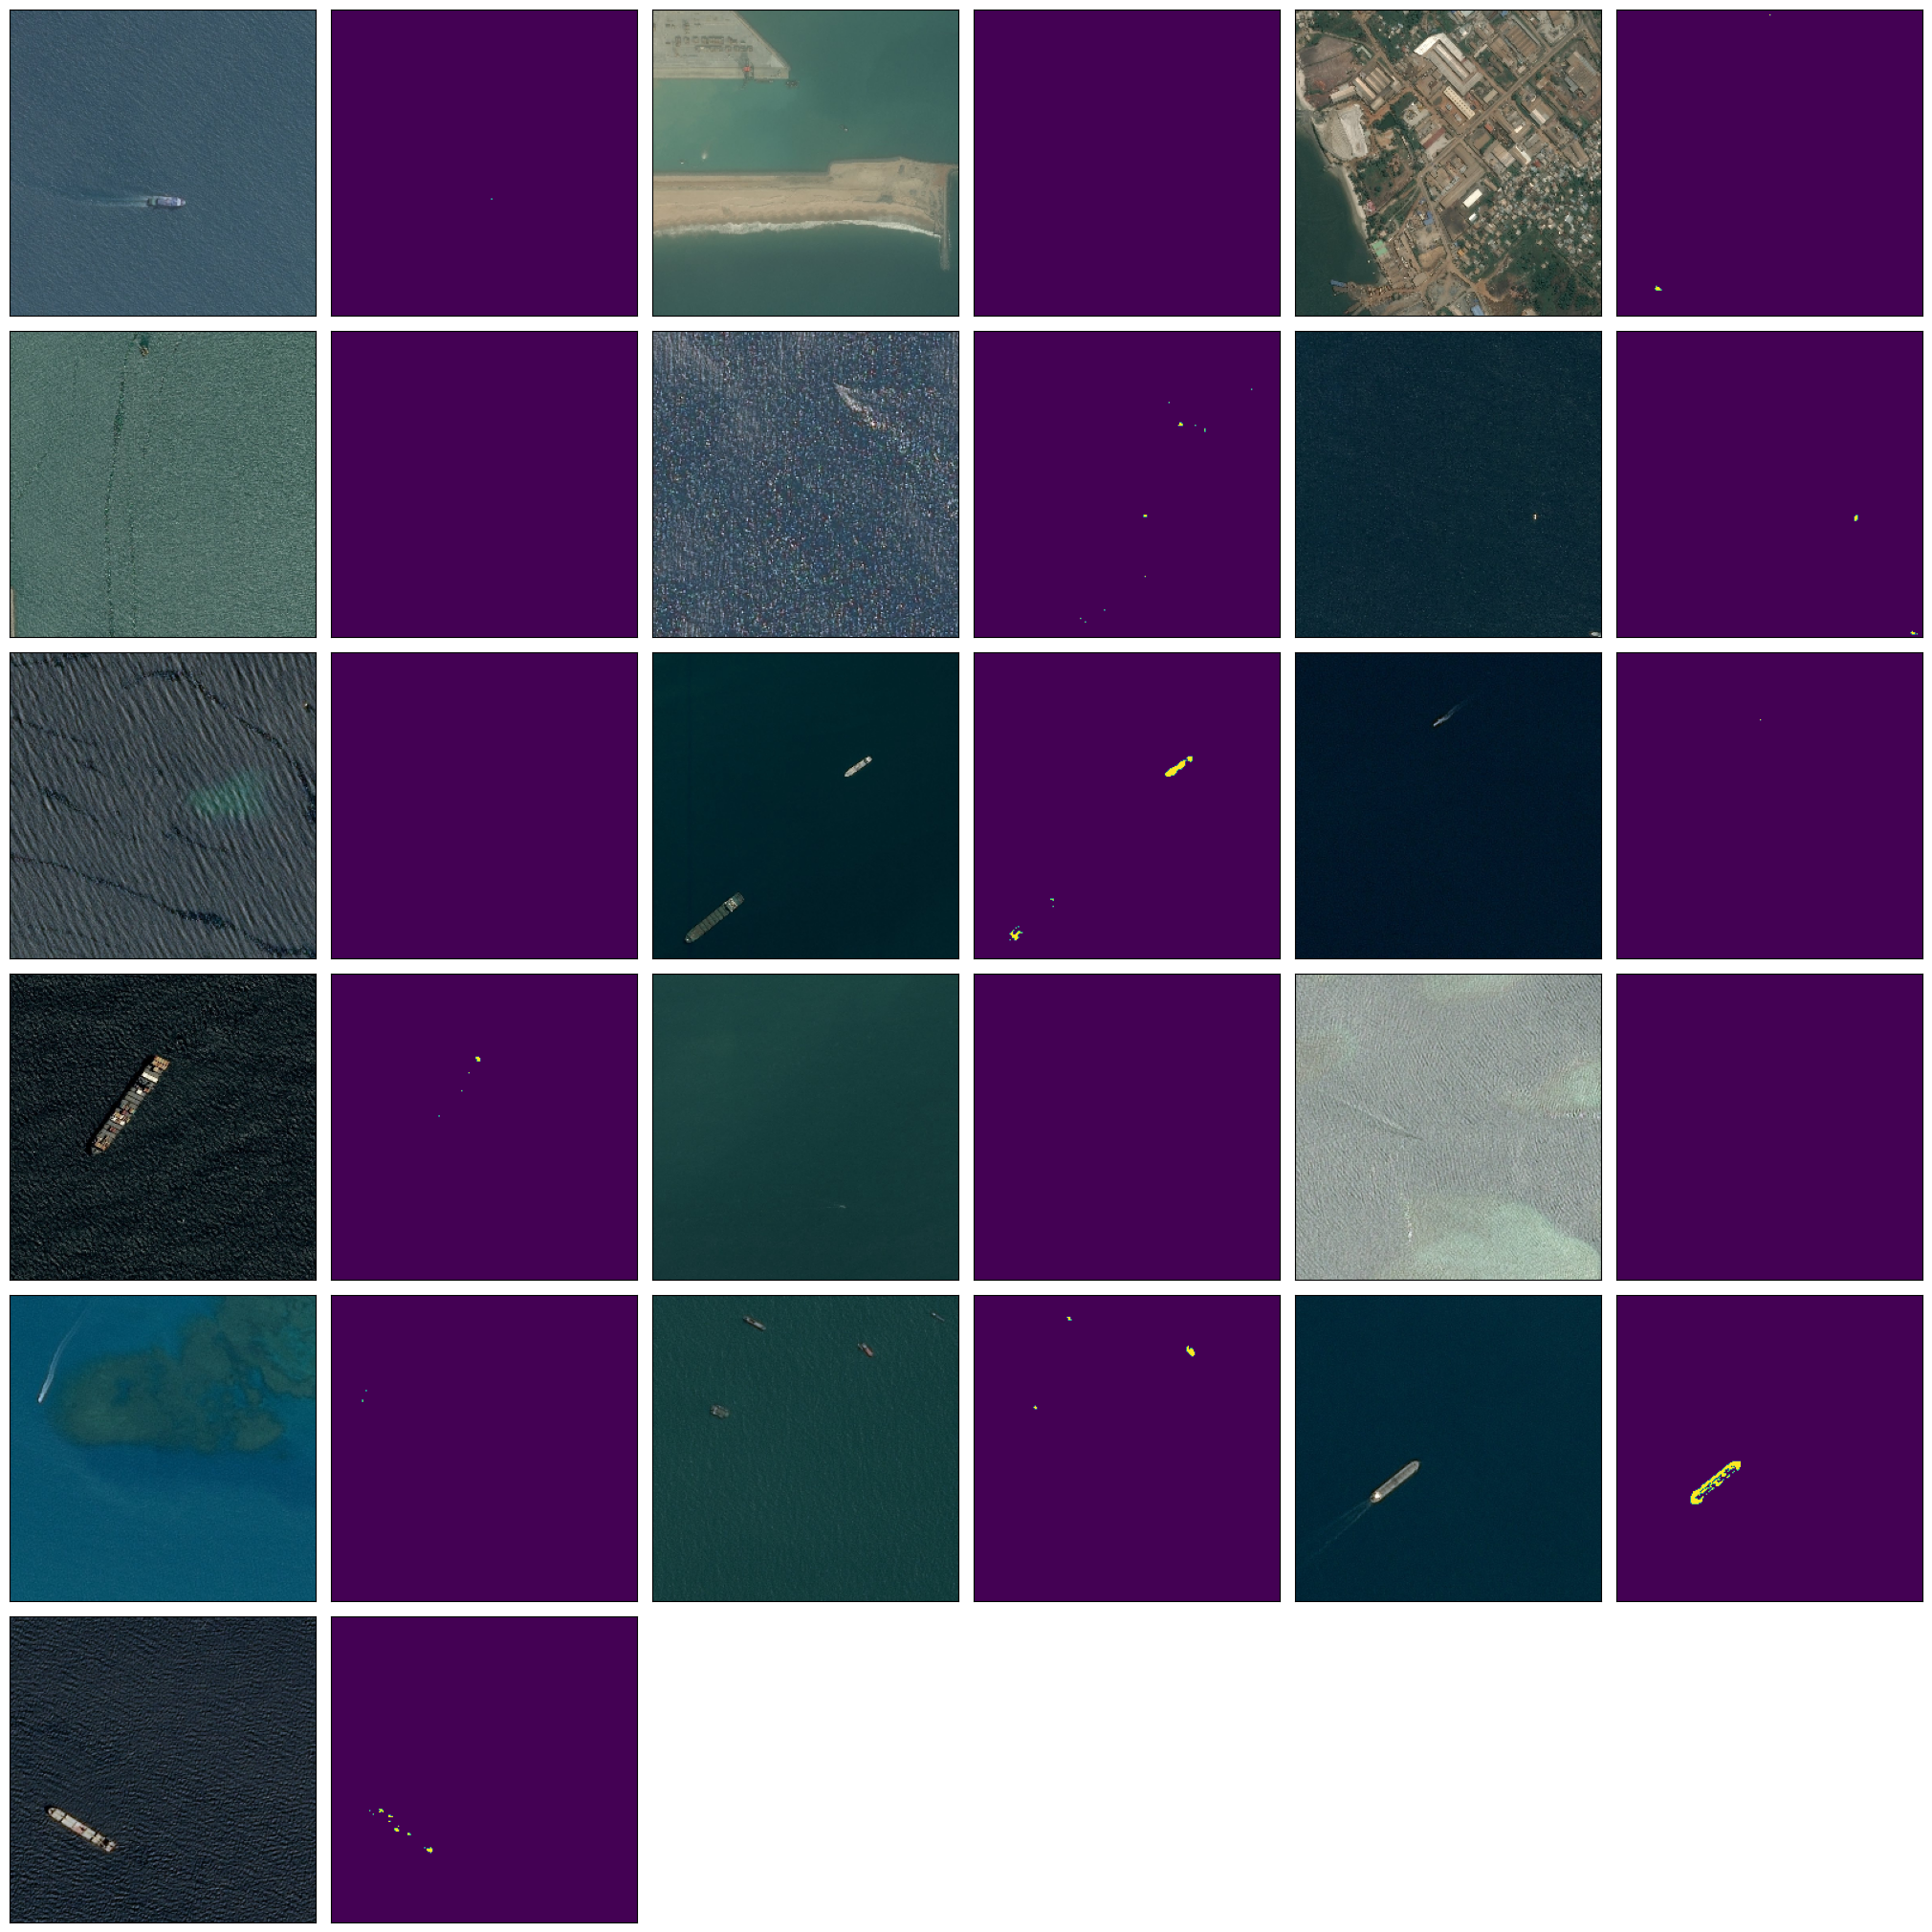

In [10]:
test_generator = test_generator("data/train_v2", 16)
X_test = next(test_generator)

model = load_model("models/unet", custom_objects={'dice_coef':dice_coef, 'iou_coef': iou_coef})
model.summary()

y_pred = model.predict(X_test)

plotImageWithMask(X_test, y_pred, True)